
📊 Unbalanced Data
F1-score (avg): 0.6729166666666667  std: 0.0771396190898901
Accuracy (avg): 0.875  std: 0.04097217358481802


e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



📊 SMOTE Balanced
F1-score (avg): 0.9366853278505783  std: 0.02994473666123673
Accuracy (avg): 0.9324949698189134  std: 0.035703515251863244


e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



📊 ADASYN Balanced
F1-score (avg): 0.9435470085470086  std: 0.029256280415501497
Accuracy (avg): 0.9428571428571428  std: 0.030304576336566306


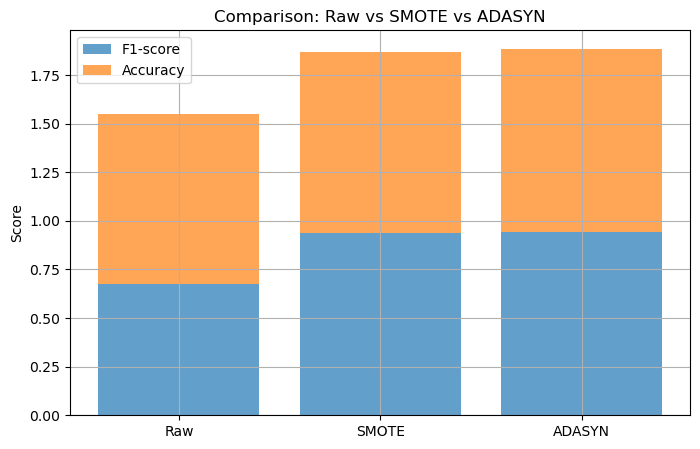

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler

# --------------------------------
# 📂 2. 加载归一化数据
# --------------------------------
df = pd.read_csv("../data/train_robot_sorted_v1.csv")  # 或 train_robot_sorted_v1.csv,train_robot_v1.csv
X = df.drop(columns=["Target"])
y = df["Target"]

# 可选：MinMaxScaler 再次确认归一化
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# 🧠 3. 定义模型结构（使用最佳结构）
# --------------------------------
def get_model():
    return MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='lbfgs',
        max_iter=500,
        random_state=42
    )

# --------------------------------
# ⚖️ 4. 定义评估函数
# --------------------------------
def evaluate(X, y, title):
    model = get_model()
    scores = cross_validate(model, X, y, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    print(f"\n📊 {title}")
    print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
    print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())
    return scores

# --------------------------------
# ✅ 5. 原始不平衡数据评估
# --------------------------------
raw_scores = evaluate(X, y, "Unbalanced Data")

# --------------------------------
# ⚙️ 6. SMOTE 平衡
# --------------------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
smote_scores = evaluate(X_smote, y_smote, "SMOTE Balanced")

# --------------------------------
# ⚙️ 7. ADASYN 平衡
# --------------------------------
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)
adasyn_scores = evaluate(X_ada, y_ada, "ADASYN Balanced")

# --------------------------------
# 📈 8. 可视化对比
# --------------------------------
labels = ['Raw', 'SMOTE', 'ADASYN']
f1_avgs = [raw_scores['test_f1'].mean(), smote_scores['test_f1'].mean(), adasyn_scores['test_f1'].mean()]
acc_avgs = [raw_scores['test_accuracy'].mean(), smote_scores['test_accuracy'].mean(), adasyn_scores['test_accuracy'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(labels, f1_avgs, alpha=0.7, label="F1-score")
plt.bar(labels, acc_avgs, alpha=0.7, label="Accuracy", bottom=f1_avgs)
plt.title("Comparison: Raw vs SMOTE vs ADASYN")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# --------------------------------
# 📦 1. 导入依赖库
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  # 可替换为 ADASYN

# --------------------------------
# 📂 2. 加载训练数据
# --------------------------------
df = pd.read_csv("../data/train_robot_v1.csv")  # 或 sorted/scaled 文件
X = df.drop(columns=["Target"])
y = df["Target"]

# --------------------------------
# 🔄 3. 归一化处理
# --------------------------------
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# ⚖️ 4. 平衡样本（使用 SMOTE）
# --------------------------------
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# --------------------------------
# ⚙️ 5. 多组结构组合配置 config_list
# --------------------------------
config_list = [
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "logistic","solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (64,),                "activation": "relu",    "solver": "lbfgs"},
    {"layers": (128, 64),            "activation": "relu",    "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10),    "activation": "relu",    "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8),      "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6),      "activation": "relu",    "solver": "lbfgs"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "adam"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "sgd"},
    {"layers": (50, 50, 25),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 50, 25),         "activation": "tanh",    "solver": "adam"},
    {"layers": (100, 50),            "activation": "tanh",    "solver": "adam"},
    {"layers": (128, 64, 32),        "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12, 6),      "activation": "relu",    "solver": "adam"},
]

# --------------------------------
# 🧪 6. 批量训练每组参数配置
# --------------------------------
results = []

for cfg in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=cfg["layers"],
        activation=cfg["activation"],
        solver=cfg["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(model, X_bal, y_bal, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    
    results.append({
        "layers": cfg["layers"],
        "activation": cfg["activation"],
        "solver": cfg["solver"],
        "F1-avg": scores["test_f1"].mean(),
        "F1-std": scores["test_f1"].std(),
        "Acc-avg": scores["test_accuracy"].mean(),
        "Acc-std": scores["test_accuracy"].std()
    })

# --------------------------------
# 📊 7. 显示结果表格
# --------------------------------
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1-avg", ascending=False).reset_index(drop=True)
df_results


e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

,layers,activation,solver,F1-avg,F1-std,Acc-avg,Acc-std
0,"(64,)",relu,lbfgs,0.948611,0.024335,0.946982,0.024949
1,"(128, 64)",relu,lbfgs,0.948016,0.025126,0.946982,0.024949
2,"(128, 64, 32)",relu,lbfgs,0.947533,0.012610,0.946881,0.011406
3,"(64, 32)",tanh,lbfgs,0.942317,0.025546,0.939839,0.027063
4,"(100, 50, 25, 10)",relu,lbfgs,0.941314,0.019783,0.939839,0.020646
5,"(50, 25, 12)",relu,lbfgs,0.923420,0.015080,0.918511,0.018011
6,"(50, 25, 12)",tanh,lbfgs,0.908602,0.054756,0.904276,0.059091
7,"(50, 25, 12)",tanh,lbfgs,0.908602,0.054756,0.904276,0.059091
8,"(50, 25, 12, 6)",relu,adam,0.908277,0.031951,0.900805,0.038689
9,"(50, 50, 25)",relu,adam,0.890036,0.043926,0.875755,0.056516


In [8]:
# --------------------------------
# 📦 1. 导入依赖
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN  # ✅ 使用 ADASYN

# --------------------------------
# 📂 2. 加载训练数据
# --------------------------------
df = pd.read_csv("../data/train_robot_v1.csv")  # 也可换成 sorted/scaled 文件
X = df.drop(columns=["Target"])
y = df["Target"]

# --------------------------------
# 🔄 3. 归一化
# --------------------------------
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --------------------------------
# ⚖️ 4. 使用 ADASYN 进行平衡
# --------------------------------
adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X, y)

# --------------------------------
# ⚙️ 5. 模型结构组合列表
# --------------------------------
config_list = [
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "logistic","solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (64,),                "activation": "relu",    "solver": "lbfgs"},
    {"layers": (128, 64),            "activation": "relu",    "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10),    "activation": "relu",    "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8),      "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6),      "activation": "relu",    "solver": "lbfgs"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "adam"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (64, 32),             "activation": "tanh",    "solver": "sgd"},
    {"layers": (50, 50, 25),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 50, 25),         "activation": "tanh",    "solver": "adam"},
    {"layers": (100, 50),            "activation": "tanh",    "solver": "adam"},
    {"layers": (128, 64, 32),        "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12, 6),      "activation": "relu",    "solver": "adam"},
]

# --------------------------------
# 🧪 6. 批量评估模型
# --------------------------------
results = []

for cfg in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=cfg["layers"],
        activation=cfg["activation"],
        solver=cfg["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(model, X_bal, y_bal, cv=4, scoring={"f1": "f1", "accuracy": "accuracy"})
    
    results.append({
        "layers": cfg["layers"],
        "activation": cfg["activation"],
        "solver": cfg["solver"],
        "F1-avg": scores["test_f1"].mean(),
        "F1-std": scores["test_f1"].std(),
        "Acc-avg": scores["test_accuracy"].mean(),
        "Acc-std": scores["test_accuracy"].std()
    })

# --------------------------------
# 📊 7. 输出对比表格
# --------------------------------
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1-avg", ascending=False).reset_index(drop=True)
df_results.head(20)  # 显示前10




e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

,layers,activation,solver,F1-avg,F1-std,Acc-avg,Acc-std
0,"(100, 50, 25, 10)",relu,lbfgs,0.958730,0.024108,0.957143,0.026726
1,"(128, 64)",relu,lbfgs,0.951470,0.021565,0.950000,0.023690
2,"(50, 25, 12)",relu,lbfgs,0.938336,0.027197,0.935714,0.029451
3,"(64,)",relu,lbfgs,0.931627,0.025370,0.928571,0.026726
4,"(50, 25, 12)",tanh,lbfgs,0.926623,0.033828,0.925000,0.034069
5,"(50, 25, 12)",tanh,lbfgs,0.926623,0.033828,0.925000,0.034069
6,"(128, 64, 32)",relu,lbfgs,0.924453,0.031555,0.925000,0.027433
7,"(64, 32)",tanh,lbfgs,0.923384,0.016018,0.917857,0.018558
8,"(64, 32, 16, 8)",relu,lbfgs,0.905789,0.037733,0.896429,0.048839
9,"(50, 50, 25)",relu,adam,0.850776,0.031432,0.853571,0.021129


In [ ]:
# --------------------------------
# 📦 1. 导入必要的库
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
import joblib  # ✅ 用于保存模型

# --------------------------------
# 📂 2. 加载排序后的训练集（归一化版本）
# --------------------------------
df = pd.read_csv("../data/train_robot_sorted_v1.csv")
X = df.drop(columns=["Target"])
y = df["Target"]

# ✅ 归一化（和之前一致，保持一致性）
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 使用 ADASYN 平衡数据
adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X_scaled, y)

# ✅ 保存 scaler（可选）
joblib.dump(scaler, "../models/minmax_scaler.pkl")

# --------------------------------
# 🧠 3. 构建最佳模型
# --------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 你选定的结构
    activation='relu',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

# 训练模型
model.fit(X_bal, y_bal)

# ✅ 保存模型
joblib.dump(model, "../models/best_model_adasyn.pkl")




e:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


TypeError: dump() missing 1 required positional argument: 'filename'